In [16]:
stations = ["HV.UWB","HV.STCD", "AV.PVV","AV.SSLS","AV.GSTD","CC.STD","CC.SEP"]

In [17]:
from obspy import UTCDateTime

# Define a function to get station coordinates
def get_station_coordinates(client, stations):
    station_coordinates = {}
    for station in stations:
        network, station_code = station.split('.')
        inventory = client.get_stations(network=network, station=station_code, level='station')
        for net in inventory:
            for sta in net:
                station_coordinates[f"{net.code}.{sta.code}"] = (sta.latitude, sta.longitude)
    return station_coordinates

# Get the coordinates of the stations
station_coordinates = get_station_coordinates(client, stations)

# Print the station coordinates
print(station_coordinates)

{'HV.UWB': (19.42476, -155.277582), 'HV.STCD': (19.38486, -155.12543), 'AV.PVV': (55.37316, -161.79199), 'AV.SSLS': (54.70938, -163.99723), 'AV.GSTD': (52.055797, -176.144777), 'CC.STD': (46.23749, -122.22421), 'CC.SEP': (46.19978, -122.190857)}


In [22]:
#coordinate data for the Icelandic stations is not available in obspy client so I will add them manually
station_coordinates["9F.NUPH"] = (63.8517, -022.2013)
station_coordinates["9F.HOPS"] = (63.8587, -022.3983)


In [23]:
print(station_coordinates)

{'HV.UWB': (19.42476, -155.277582), 'HV.STCD': (19.38486, -155.12543), 'AV.PVV': (55.37316, -161.79199), 'AV.SSLS': (54.70938, -163.99723), 'AV.GSTD': (52.055797, -176.144777), 'CC.STD': (46.23749, -122.22421), 'CC.SEP': (46.19978, -122.190857), '9F.NUPH': (63.8517, -22.2013), '9F.HOPS': (63.8587, -22.3983)}


In [31]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 12.4 MB/s eta 0:00:00a 0:00:01


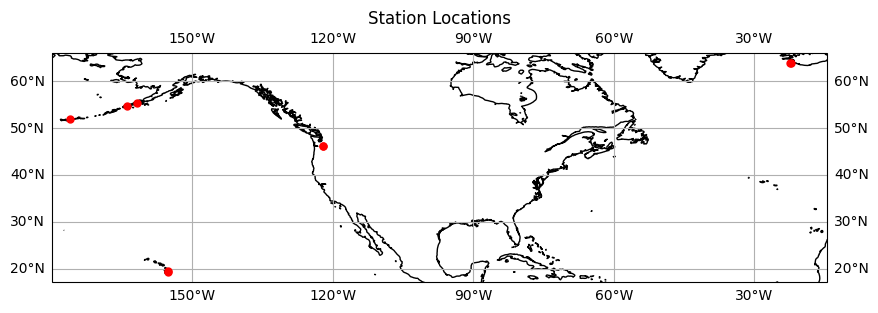

In [52]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title('Station Locations')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot each station
for station, (lat, lon) in station_coordinates.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    #ax.text(lon + 0.2, lat + 0.2, station, transform=ccrs.PlateCarree()) # Add station labels

plt.show()

